# Hypothesis Test

Dalam analisis statistik, kita biasanya menggunakan data dari beberapa sampel yang dipilih untuk menarik kesimpulan tentang populasi tersebut. Suatu studi yang benar harus memastikan bahwa data sampel mewakili populasi (representatif):

- Populasi: **himpunan pengukuran** (atau catatan beberapa sifat kualitatif) yang berhubungan dengan seluruh koleksi unit tentang informasi yang dicari.
- Sampel adalah **himpunan bagian dari pengukuran**, yang terdiri dari beberapa unit, yang dihimpun dalam suatu penelitian/ investigasi.

Misalkan suatu penelitian dilakukan untuk memperkirakan rata-rata berat badan bayi lahir di Kabupaten XYZ. Kita tidak mengambil semua data tentang berat bayi lahir di kabupaten tersebut, melainkan hanya beberapa sampel acak (yang harapannya representatif). Berdasarkan statistik sampel tersebut, kita dapat menduga tentang parameter (karakter populasi) yang sesuai dalam populasi.  

- Parameter: Karakteristik populasi, seperti mean atau deviasi standar. Sering dinotasikan menggunakan huruf Yunani.
- Statistik: Karakteristik sampel yang dapat diukur. Contoh statistik adalah: nilai rata-rata dari data sampel

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Normality test

### Probability plot

Dalam statistik terdapat banyak cara yang tersedia untuk menilai distribusi secara visual. Sejumlah metode grafis tersedia untuk membandingkan dua distribusi probabilitas dengan menggambar plot kuantitasnya, atau parameter yang terkait erat, satu sama lain [1]:
1. QQ-Plots: "Q" dalam QQ-plot adalah singkatan dari kuantil (Quantile). Kuantil dari kumpulan data tertentu diplotkan terhadap kuantitas distribusi referensi, biasanya distribusi normal standar.
2. Plot-PP: Plot CDF (fungsi-distribusi-kumulatif) dari kumpulan data tertentu terhadap CDF dari distribusi referensi.
3. Plot Probabilitas: Plotkan nilai yang diurutkan dari kumpulan data tertentu terhadap jumlah distribusi referensi.

Dengan Python, plot probabilitas dapat dibuat dengan perintah `stats.probplot (data, plot = plt)`

In [3]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

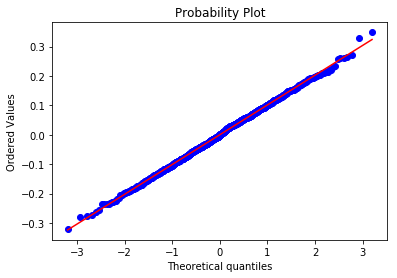

In [4]:
# plot menggunakan package dari plt
stats.probplot(s, plot = plt)
plt.show()

### Tests for Normality

Dalam pengujian normalitas, tantangan yang berbeda dapat muncul: ukuran sampel data (kecil atau besar), nilai ekstrem/outlier/pencilan. Untuk mengatasi situasi yang berbeda, telah dikembangkan tes yang berbeda untuk normalitas. Tes untuk mengevaluasi normalitas (atau kesamaan dengan beberapa distribusi tertentu) secara luas dapat dibagi menjadi dua kategori [1]:
1. Pengujian berdasarkan perbandingan ("paling cocok") dengan distribusi tertentu, sering kali ditentukan dalam istilah CDF-nya. Contohnya adalah tes Kolmogorov-Smirnov, tes Lilliefors, tes Anderson-Darling, kriteria Cramer-von Mises, serta tes Shapiro-Wilk dan Shapiro-Francia.
2. Pengujian berdasarkan statistik deskriptif sampel. Contohnya adalah uji kemiringan, uji kurtosis, uji omnibus D’Agostino – Pearson, atau uji Jarque – Bera.

Uji normalitas: Shapiro – Wilk, jarque-bera. Hipotesis nol untuk uji normalitas tersebut adalah
$H_0$: data berdistribusi normal


In [5]:
# Example of the Shapiro-Wilk test

data = [30, 50, 35, 23, 34, 56, 12, 12, 37, 16]
stat, p = stats.shapiro(data)

# Optional: hanya digunakan untuk keperluan menampilkan hasil

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Normal')
else:
    print('Probably not Normal')

stat=0.936, p=0.512
Probably Normal


In [6]:
# Example of the jarque_bera test

stat, p = stats.jarque_bera(data)
stat, p

(0.5368735408672259, 0.764573764949138)

### Manakah yang harus digunakan?    

Sesuaikan dengan tujuan pengujian normalitas. Contohnya, pada data runtun waktu, beberapa sumber menyarankan pengujian melibatkan uji skewness, kurtosis. Berikut suatu jurnal mengenai perbandingan kekuatan uji normalitas [Comparisons of various types of normality tests](https://www.tandfonline.com/doi/pdf/10.1080/00949655.2010.520163). Berikut kesimpulannya: 
1. Untuk distribusi ekor pendek yang simetris, pengujian D’Agostino dan Shapiro – Wilk memiliki daya yang lebih baik. 
2. Untuk distribusi ekor panjang yang simetris, kekuatan uji Jarque – Bera dan D’Agostino cukup sebanding dengan uji Shapiro – Wilk. 
3. Sedangkan untuk distribusi asimetris, tes Shapiro-Wilk adalah tes terkuat yang diikuti oleh tes Anderson-Darling.

## Correlation Tests

Terdapat beberapa metode untuk uji korelasi [2]:

#### Pearson correlation

Korelasi Pearson ($\rho$), yang mengukur ketergantungan linier antara dua variabel (x dan y). Korelasi ini dikenal sebagai uji korelasi parametrik karena bergantung pada distribusi data. Selain itu, korelasi ini hanya dapat digunakan jika x dan y berasal dari distribusi normal. Plot dari y = f (x) dinamai kurva regresi linier.

Berbeda dengan, koefisien korelasi peringkat Tau dan Spearman Kendall menilai asosiasi statistik berdasarkan peringkat data. Pemeringkatan data dilakukan pada variabel-variabel yang disusun secara terpisah dan diberi nomor.

The hypothesis for $\rho$ correlation (pearson):  

$H_0: \rho = 0$ (the variables are independent, that there is no correlation between them)   
$H_1: \rho \ne 0$   

#### Kendall correlation

Asumsi dari Kendall [3]:

Asumsi #1: Kedua variabel harus diukur pada **skala ordinal atau kontinu**. Contoh variabel ordinal termasuk skala Likert (misalnya, skala 7 poin dari sangat setuju hingga sangat tidak setuju), di antara cara lain untuk peringkat kategori (misalnya, skala 5 poin yang menjelaskan seberapa besar pelanggan menyukai suatu produk, mulai dari " Tidak terlalu banyak "hingga" Ya, banyak "). Contoh variabel kontinu (yaitu, variabel interval atau rasio) termasuk waktu revisi (diukur dalam jam), kecerdasan (diukur menggunakan skor IQ), kinerja ujian (diukur dari 0 hingga 100), berat (diukur dalam kg), dan sebagainya.      
Asumsi #2: Tau-b Kendall menentukan apakah ada hubungan monotonik antara kedua variabel kita. Oleh karena itu, sebaiknya data kita tampak mengikuti hubungan monotonik, sehingga pengujian formal untuk keterkaitan semacam itu masuk akal, tetapi ini bukan asumsi yang ketat.

Hubungan monotonik adalah hubungan dari salah satu hal berikut: (1) seiring dengan meningkatnya nilai satu variabel, begitu pula nilai variabel lainnya; atau (2) ketika nilai satu variabel meningkat, nilai variabel lainnya menurun.

![Gambar Hubungan Monotonik dan Non-Monotonik](https://statistics.laerd.com/statistical-guides/img/spearman-1-small.png)

Contoh persoalan yang diselesaikan dengan korelasi tipe ini: korelasi antara nilai ujian (A, B, C, D, E) dengan waktu yang dihabiskan pada sosial media per hari (1-2 hours, 3-4 hours, 4-5 hours, more than 5 hours).

Hipotesis untuk Kendall (korelasi $\tau$) yaitu $H_0: \tau = 0$ (Variabel-variabelnya independen, atau tidak terdapat korelasi antara variabel). Akan tetapi, perbedaan antara korelasi $\rho$ dan korelasi $\tau$ adalah bahwa kita dapat memiliki satu dari tiga alternatif hipotesis untuk korelasi $\tau$:    
1. Two sided: $H_1: \tau \ne 0$
2. One sided: $H_1: \tau > 0$ or $H_1: \tau < 0$


In [7]:
# Example of the Pearson's Correlation test

data1 = [23, 12, 14, 33, 25, 28, 29, 19, 17, 30]
data2 = [50, 54, 40, 77, 44, 46, 67, 45, 49, 77]
stat, p = stats.pearsonr(data1, data2)

stat, p

(0.6736156288938372, 0.03272344965745216)

In [8]:
# Example of Spearman Correlation test
stat, p = stats.spearmanr(data1, data2)
stat, p

(0.5835893219328621, 0.07653771742823341)

**Example 1**: From Armitage and Berry (1994, p. 466). Test workbook (Nonparametric worksheet: Career, Psychology). The following data represent a tutor's ranking of ten clinical psychology students as to their suitability for their career and their knowledge of psychology:   

Career    | Psychology |  
-----| ----- |
4|5     
10|8  
3|6  
1|2   
9|10   
2|3    
6|9   
7|4    
8|7   
5|1   
 



In [9]:
career = [4, 10, 3, 2, 9, 2, 6, 7, 8, 5]
psy = [5, 8, 6, 2, 10, 3, 9, 4, 7, 1]
stat, p = stats.kendalltau(career, psy) # two sided

stat, p

(0.49441323247304414, 0.04819348829319082)

**Example 2**: Ukurlah hubungan antara nilai ujian (A, B, C, D), dengan lama waktu bersosial media (1-2, 2-3, 3-4, >5). Oleh karena skalanya ordinal, maka perlu diubah terlebih dahulu. Nilai (A=1, B=2, C=3, D=4), dan waktu (1-2:1, 2-3:2, 3-4:3, >5: 4) 

In [10]:
a = [2, 1, 3, 4, 1, 2, 3, 2, 1]
b = [2, 1, 2, 3, 1, 1, 3, 1, 2]
s, p = stats.kendalltau(a, b)

s, p

(0.6191034846198453, 0.04566045451954555)

## Stationary Tests  

Suatu data runtun waktu $Y_t (t = 1,2 ...)$ dikatakan stasioner (dalam arti lemah/weak) jika sifat statistiknya tidak bervariasi terhadap waktu (ekspektasi, varians, autokorelasi). White noise adalah contoh deret waktu stasioner, dengan contoh kasus yaitu $Y_t$ mengikuti distribusi normal $N (\mu, \sigma^2)$ tidak bergantung pada t.

Uji yang umumnya digunakan untuk stasioneritas adalah is ADF (Augmented Dickey Fuller test). Hipotesisnya yaitu:  
$H_0: \delta = 0$ (data tidak stasioner karena mengandung akar unit/unit root)

In [11]:
# ADF test
yt = np.random.normal(loc=5, scale = 2, size=10)
yt

array([ 6.29473691,  5.81450269,  2.86147461,  6.07262369,  0.73133163,
       10.69400502,  4.84557682, 10.32232355,  1.10786004,  3.14742769])

In [12]:
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(yt)
stat, p

(-2.0393162552747626, 0.26960467112856606)

In [13]:
lags, crit

(2,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733})

## Uji Rata-Rata

The test for one mean: one sample t-test   
The test for comparing two means: t-test paired and independent    
The test for comparing more than two means: anova   

### One sample t-test

Fungsi dari one-sample t-test: `stats.ttest_1samp(data, popmean)`

Contoh: Diketahui suatu data = [3, 4, 6, 7, 4, 5, 5, 9, 10, 5, 8, 8, 9, 9]. Akan dilakukan uji hipotesis 1 sampel, untuk mengetahui apakah mean data sama dengan 5. Hipotesis untuk ujinya adalah   
$H_0: \mu = 5$    
$H_1: \mu \ne 5$

In [14]:
# two sided one-sample t-test
aa = [3, 4, 6, 7, 4, 5, 5, 9, 10, 5, 8, 8, 9, 9]
t, pVal = stats.ttest_1samp(aa, popmean=5)
t, pVal

(2.581715367209975, 0.022782422702715216)

Berdasarkan hasil, p-value=0.02 yang lebih kecil dari $\alpha=0.05$, sehingga tolak $H_0$.   

Bagaimana dengan uji one-sided? 
Apabila kita hitung mean dari sampel akan diperoleh nilai 6.57. Namun, apakah mean populasi juga akan bernilai **lebih dari 5**?   

Hipotesis yang kita gunakan yaitu:   
$H_0: \mu = 5$    
$H_1: \mu > 5$

In [15]:
# Jika menggunakan one sided maka cukup membagi dua p-value pada hasil two-sided yaitu p-value/2

pVal/2

0.011391211351357608

Berdasarkan hasil, p-value=0.01 yang jauh lebih kecil dari $\alpha=0.05$, sehingga tolak $H_0$. Artinya, dengan tingkat kepercayaan 95%, mean populasi secara signifikan lebih besar daripada 5. 

### Two sample t-test

Fungsi yang digunakan untuk menguji perbedaan rata-rata dua populasi yang independen yaitu `stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')` 

Fungsi yang digunakan untuk uji perbedaan rata-rata dua populasi berpasangan (paire): `stats.ttest_rel(a, b, axis=0, nan_policy='propagate')`

**Contoh 1**: Diketahui dua sampel data random, dengan kunci random 123. Ujilah dengan t-test independen, variansi tidak sama. Hipotesis yang digunakan    
Hipotesis yang kita gunakan yaitu:   
$H_0: \mu_1 - \mu_2 = 0$    
$H_1: \mu_1 - \mu_2 \ne 0$

In [16]:
# Uji perbedaan rata-rata 2 populasi, dengan variansi tidak sama

np.random.seed(123)
data1 = stats.norm.rvs(loc=5,scale=10,size=500)
data2 = stats.norm.rvs(loc=5,scale=10,size=500)

a, b = stats.ttest_ind(data1,data2, equal_var = False)

In [17]:
# a, b berturut-turut adalah statistik dan p-value
a, b

(0.02904612003069042, 0.9768336149579995)

**Contoh 2**: Diketahui dua sampel data random, dengan kunci random 456. Ujilah dengan t-test paired, variansi tidak sama. Hipotesis yang digunakan    
Hipotesis yang kita gunakan yaitu:   
$H_0: \mu_d = 0$    
$H_1: \mu_d \ne 0$

In [21]:
# Uji perbedaan rata-rata 2 populasi berpasangan

np.random.seed(456)
data1 = stats.norm.rvs(loc=8,scale=10,size=50)
data2 = stats.norm.rvs(loc=8,scale=10,size=50)

a, b = stats.ttest_rel(data1,data2)

In [22]:
a, b

(-0.22111035345211244, 0.8259253278353127)

### ANOVA

Salah satu fungsi yang digunakan untuk ANOVA yaitu: `stats.f_oneway(*args)`

Example: Here are some data on a shell measurement (the length of the anterior adductor muscle scar, standardized by dividing by length) in the mussel Mytilus trossulus from five locations: Tillamook, Oregon; Newport, Oregon; Petersburg, Alaska; Magadan, Russia; and Tvarminne, Finland, taken from a much larger data set used in McDonald et al. (1991)[4].   

Hipotesis yang digunakan:    
$H_0: \mu_1=\mu_2=...=\mu_5$    
$H_1: \mu_i \ne \mu_j$ dengan $i, j = 1, 2, ..., 5; i \ne j$

In [20]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]


stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

Reference:
1. Haslwanter, Thomas. An Introduction to Statictics with Python. Springer. 
2. http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r
3. https://statistics.laerd.com/spss-tutorials/kendalls-tau-b-using-spss-statistics.php
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html